(75, 5) (75, 3) (5, 3)
Epoch: 0    Loss: 81.15017354488373
Epoch: 1    Loss: 74.5425728559494
Epoch: 2    Loss: 72.95180010795593
Epoch: 3    Loss: 71.72472581267357
Epoch: 4    Loss: 70.56657135486603
Epoch: 5    Loss: 69.65617623925209
Epoch: 6    Loss: 68.72500824928284
Epoch: 7    Loss: 68.15186950564384
Epoch: 8    Loss: 67.34543204307556
Epoch: 9    Loss: 67.06632897257805
Epoch: 10    Loss: 66.2106699347496
Epoch: 11    Loss: 66.13474535942078
Epoch: 12    Loss: 65.0824385881424
Epoch: 13    Loss: 65.13022731244564
Epoch: 14    Loss: 63.84935110807419
Epoch: 15    Loss: 63.98804320394993
Epoch: 16    Loss: 62.5385425388813
Epoch: 17    Loss: 62.76475140452385
Epoch: 18    Loss: 61.22334972023964
Epoch: 19    Loss: 61.538020461797714
Epoch: 20    Loss: 59.95892706513405
Epoch: 21    Loss: 60.35854463279247
Epoch: 22    Loss: 58.77130737900734
Epoch: 23    Loss: 59.24857671558857
Epoch: 24    Loss: 57.66701427102089
Epoch: 25    Loss: 58.21306078135967
Epoch: 26    Loss: 56.642885

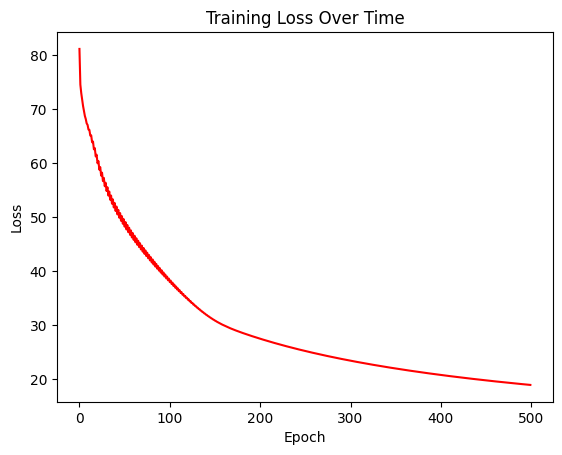

Training accuracy: 94.66666666666667 %
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data from CSV file
def get_data(file_name, labels=True, header=None):
    try:
        # Read data from CSV file
        data = pd.read_csv(file_name, header=header).values
        N, d = data.shape
        # Split data into input x and output y
        if labels:       
            x = data[:, 0:d-1].reshape(-1, d-1)
            y = data[:, d - 1].reshape(-1, 1)
        else:
            x = data[:, 0:d].reshape(-1, d)
            y = data[:, 0].reshape(-1, 1)
        return x, y
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        raise

# Add bias and modify labels
def prepare_data(x, y, train=True):
    N = x.shape[0]
    y_train = np.array([])	
    x_train = np.array([])
    if train:
        for d in y:
            # Convert labels
            if d == "Iris-setosa":
                y_train = np.append(y_train, 0)
            elif d == "Iris-versicolor":
                y_train = np.append(y_train, 1)
            else:
                y_train = np.append(y_train, 2)
        y_train = y_train.reshape(-1, 1)
    # Add bias column
    x_train = np.hstack((np.ones((N, 1)), x))
    return x_train, y_train

# Save data to CSV file
def set_data(input_filename, y_val_predict, output_filename):
    try:
        df = pd.read_csv(input_filename, header=None)
        class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
        df['predict'] = y_val_predict
        df['predict'] = df['predict'].map(lambda x: class_names[x])
        df.to_csv(output_filename, header=False, index=False)
    except Exception as e:
        print(f"Error saving file {output_filename}: {e}")
        raise

# Convert y to one-hot encoding
def one_hot_encoding(y):
    N = y.shape[0]
    K = len(np.unique(y))
    Y = np.zeros((N, K))
    for i in range(N):
        Y[i, y[i]] = 1
    return Y

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def train(x_train, y_train, w, lr, num_of_iteration):
    losses = []
    for epoch in range(num_of_iteration):
        z = np.dot(x_train, w).astype(np.float32)
        y_predict = softmax(z)
        epsilon = 1e-7 
        loss = -np.sum(y_train * np.log(y_predict + epsilon))
        losses.append(loss)
        dz = y_predict - y_train
        dw = np.dot(x_train.T, dz)
        w = w - lr*dw
        print(f"Epoch: {epoch}    Loss: {losses[-1]}")
    return w, losses

if __name__ == "__main__":
   X, Y = get_data('input.csv')
   x_train, y_train = prepare_data(X, Y)
   y_train = y_train.astype('uint8')
   y_train = one_hot_encoding(y_train)

   w = np.multiply(0.01, np.random.randn(x_train.shape[1], y_train.shape[1]))
   lr = 0.001
   num_of_iteration = 500
   print(x_train.shape, y_train.shape, w.shape)

   w, losses = train(x_train, y_train, w, lr, num_of_iteration)

   x_axis = np.arange(len(losses))
   plt.plot(x_axis, losses, color='r')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.title('Training Loss Over Time')
   plt.show()

   y_predict1 = softmax(np.dot(x_train, w).astype(np.float32))
   y_predict1 = np.argmax(y_predict1, axis=1)

   y_true = np.argmax(y_train, axis=1)

   accuracy = np.mean(y_predict1 == y_true)
   print("Training accuracy:", accuracy * 100, "%")

   x_val, y_val = get_data('output.csv', False)
   x_val, y_val = prepare_data(x_val, y_val, False)

   y_val_predict = softmax(np.dot(x_val, w).astype(np.float32))
   y_val_predict = np.argmax(y_val_predict, axis=1)
   print(y_val_predict)
   set_data('output.csv', y_val_predict, 'result.csv')


In [4]:
import csv
import math
from heapq import heappop, heappush

def read_input(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        first_line = next(reader)
        n = int(first_line[0])
        start_row = int(first_line[1])
        start_col = int(first_line[2])
        grid = []
        for line in reader:
            grid.append(list(map(int, line)))
    return n, start_row, start_col, grid

def write_output(path, path_list):
    with open(path, 'w', newline='') as file:
        writer = csv.writer(file)
        if path_list == -1:
            writer.writerow([-1])
        else:
            writer.writerow([len(path_list)])
        for position in path_list:
            writer.writerow(position)

def is_valid_move(x, y, n, grid, visited):
    return 0 <= x < n and 0 <= y < n and grid[x][y] == 1 and (x, y) not in visited

def heuristic(x, y, n):
    return min(x, n - 1 - x) + min(y, n - 1 - y)

def a_star(n, start_row, start_col, grid):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    open_set = [(heuristic(start_row, start_col, n), 0, start_row, start_col, [(start_row, start_col)])]
    visited = set()
    
    while open_set:
        _, g, x, y, path = heappop(open_set)
        
        if x in [0, n-1] or y in [0, n-1]:
            return path  # Escape found
        
        visited.add((x, y))
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if is_valid_move(nx, ny, n, grid, visited):
                new_g = g + 1
                f = new_g + heuristic(nx, ny, n)
                heappush(open_set, (f, new_g, nx, ny, path + [(nx, ny)]))
    
    return -1  # No escape found

def main():
    input_file = "A_in.csv"
    n, start_row, start_col, grid = read_input(input_file)
    path = a_star(n, start_row, start_col, grid)
    output_file = 'A_out.csv'
    write_output(output_file, path)
    print(f"Output file has been written successfully to {output_file}!")

if __name__ == "__main__":
    main()

Output file has been written successfully to A_out.csv!
